In [1]:
from pathlib import Path 
import sys
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.individ_group as ig
import ProbabilisticParcellation.plot as ppp
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import scipy.stats as ss

fig_dir = '/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/papers/AtlasPaper/figure_parts'

## Concatenate data

In [54]:
# Import tsv file
for k,key in enumerate(['language', 'demand', 'social', 'general']):
    fname = ut.model_dir+ f'/Models/Evaluation_03/localizer_battery_{key}_sym32.tsv'
    data = pd.read_csv(fname,sep='\t')
    if k==0:
        Data = D
    else:
        Data = pd.concat([Data,D])
Data['mask'] = 'whole cereblum'


# Add the spatially constrained data
for k,key in enumerate(['language', 'demand']):
    fname = ut.model_dir+ f'/Models/Evaluation_03/localizer_battery_{key}_sym32_spatial.tsv'
    data = pd.read_csv(fname,sep='\t')
    Data = pd.concat([Data,D])

fname_all = ut.model_dir+ f'/Models/Evaluation_03/localizer_battery_sym32_all.tsv'
Data.to_csv(fname_all,sep='\t')
Data.head()

,Unnamed: 0,type,runs,dcbc,subject,mask,localizer
0,0,group,0,0.123990,1,whole cereblum,demand
1,0,data,1,0.042256,1,whole cereblum,demand
2,0,data and group,1,0.085230,1,whole cereblum,demand
3,0,data,2,0.043510,1,whole cereblum,demand
4,0,data and group,2,0.071743,1,whole cereblum,demand


### Load results and plot Figure

In [34]:
def plot_dcbc_localizer(fname,normalize=True):
    plt.figure(figsize=(5,4))
    D = pd.read_csv(ut.model_dir + '/Models/Evaluation_03/' + fname,sep='\t')
    gm = D.dcbc[data.type=='group'].mean()
    ## Subtract the value of 'group' from the individual dcbc values
    if normalize:
        A=pd.pivot_table(data[data.type=='group'],values='dcbc',index='subject')
        baseline = A.loc[data.subject,'dcbc'].values 
        D.dcbc=D.dcbc-baseline+gm
    sb.lineplot(data=D[D.type=='data and group'],y='dcbc',x='runs',
                hue='localizer',
                errorbar='se',
                markers=True, dashes=False)
    sb.despine()
    runs = np.arange(16,dtype=int)+1
    labels = [f'{i*4}' if (i==1 or i%4==0) else '' for i in runs]

    plt.xticks(ticks=runs,labels=labels)
    plt.xlabel('Functional localizer [min]')
    plt.axhline(gm,color='b',ls=':')



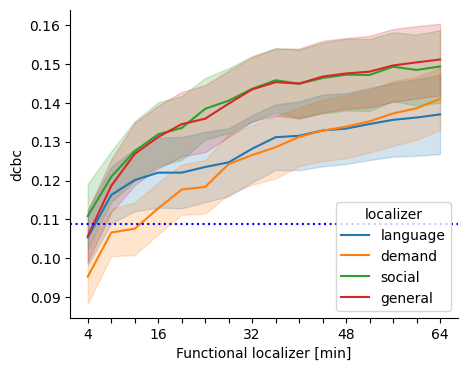

In [35]:
plot_dcbc_localizer(f'localizer_battery_sym32_all.tsv')


In [51]:
def plot_dcbc_localizer_spatial(fname,normalize=True):
    plt.figure(figsize=(5,4))
    D = pd.read_csv(ut.model_dir + '/Models/Evaluation_03/' + fname,sep='\t')

    for l,localizer in enumerate(D.localizer.unique()):
        data = D[D.localizer==localizer]
        gm = data.dcbc[data.type=='group'].mean()
        ## Subtract the value of 'group' from the individual dcbc values
        if normalize:
            A=pd.pivot_table(data[data.type=='group'],values='dcbc',index='subject')
            baseline = A.loc[data.subject,'dcbc'].values 
            data.dcbc=data.dcbc-baseline+gm
        
        sb.lineplot(data=data[data.type=='data and group'],y='dcbc',x='runs',
                    hue='mask', style='mask',
                    errorbar='se',
                    markers=True, dashes=False)
        sb.despine()
        runs = np.arange(16,dtype=int)+1
        labels = [f'{i*4}' if (i==1 or i%4==0) else '' for i in runs]

        plt.xticks(ticks=runs,labels=labels)
        plt.xlabel('Functional localizer [min]')
        plt.axhline(gm,color='b',ls=':')
        # Remove legend if not the first plot
        if l>0:
            plt.legend().remove()
        else:
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        


In [53]:
D = pd.read_csv(ut.model_dir + '/Models/Evaluation_03/' + f'localizer_battery_demand_sym32_spatial.tsv',sep='\t')
D['localizer'] = 'demand'
D.to_csv(ut.model_dir + '/Models/Evaluation_03/' + f'localizer_battery_demand_sym32_spatial.tsv',sep='\t',index=False)

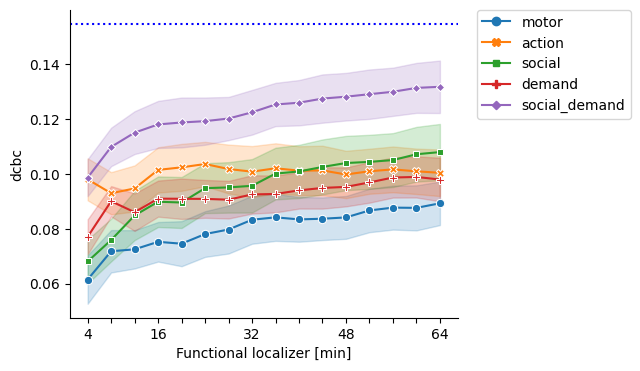

In [52]:
plot_dcbc_localizer_spatial(f'localizer_battery_language_sym32_spatial.tsv')

In [27]:
def plot_dcbc(fname,normalize=True):
    plt.figure(figsize=(5,4))
    D = pd.read_csv(ut.model_dir + '/Models/Evaluation_03/' + fname,sep='\t')
    gm = D.dcbc[D.type=='group'].mean()
    ## Subtract the value of 'group' from the individual dcbc values
    if normalize:
        A=pd.pivot_table(D[D.type=='group'],values='dcbc',index='subject')
        baseline = A.loc[D.subject,'dcbc'].values 
        D.dcbc=D.dcbc-baseline+gm
    sb.lineplot(data=D[D.type!='group'],y='dcbc',x='runs',
                hue='type', 
                errorbar='se',
                markers=True, dashes=False)
    sb.despine()
    runs = np.arange(16,dtype=int)+1
    labels = [f'{i*10}' if (i==1 or i%4==0) else '' for i in runs]

    plt.xticks(ticks=runs,labels=labels)
    plt.xlabel('Functional localizer [min]')
    plt.axhline(gm,color='b',ls=':')



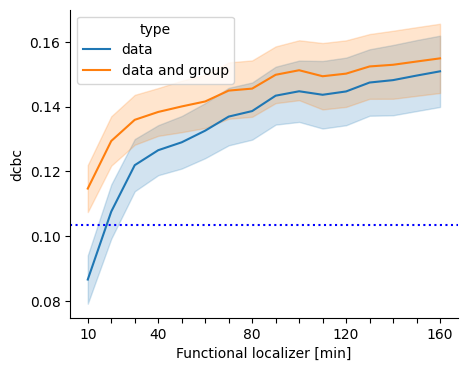

In [28]:
plot_dcbc('indivgroup_NettekovenSym32.tsv')
